In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import cross_validate

In [13]:
set(sns.get_dataset_names())

{'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic'}

## Метрики классификации
Посмотрим работу с метриками классификации.  
Для этого поугадываем вид пингвина.

In [9]:
df = sns.load_dataset('penguins').dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


X и y выберем просто 

In [23]:
# не буду включать остров, т.к. это сильная подсказка
df.groupby(['island', 'species']).count()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species                                                       
Biscoe    Adelie                 44             44                 44   
          Gentoo                119            119                119   
Dream     Adelie                 55             55                 55   
          Chinstrap              68             68                 68   
Torgersen Adelie                 47             47                 47   

                     body_mass_g  sex  
island    species                      
Biscoe    Adelie              44   44  
          Gentoo             119  119  
Dream     Adelie              55   55  
          Chinstrap           68   68  
Torgersen Adelie              47   47

In [44]:
X = df.iloc[:, 2:-1]
y = df['species']

Поделим данные на трейн и тест

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier

In [101]:
# сделаем дерево глубиной 5
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Оценим качество классифкатора

In [102]:
y_pred = classifier.predict(X_test)

In [103]:
metrics.accuracy_score(y_test, y_pred)

0.9642857142857143

In [104]:
metrics.precision_score(y_test, y_pred, average='weighted')

0.9685714285714285

In [105]:
metrics.recall_score(y_test, y_pred, average='weighted')

0.9642857142857143

In [106]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.9645751917788391

In [107]:
metrics.roc_auc_score(y_test, classifier.predict_proba(X_test), average='weighted', multi_class='ovr')

0.9893640251799645

## Cross validate
Как использовать обученную модель?

In [3]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

In [28]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()

In [17]:
cv_results = cross_validate(lasso, X, y, cv=3)
cv_results

{'fit_time': array([0.00197244, 0.0010283 , 0.00099921]),
 'score_time': array([0.        , 0.        , 0.00100398]),
 'test_score': array([0.33150734, 0.08022311, 0.03531764])}

In [18]:
lasso.predict(X)

NotFittedError: This Lasso instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Модели как будто нет: "This Lasso instance is not fitted yet". Попробуем предварительно обучить.

In [19]:
lasso.fit(X[:10], y[:10])

Lasso()

In [25]:
cv_results = cross_validate(lasso, X, y, cv=3)
cv_results

{'fit_time': array([0.00099587, 0.00099945, 0.00099659]),
 'score_time': array([0.        , 0.00099683, 0.00100851]),
 'test_score': array([0.33150734, 0.08022311, 0.03531764])}

Предварительное обучение никак не влияет на результат (тест_скор).  
cross_validate сам обучает "сырую" модель и выдает скор, не давая возможности выбрать конкретную модель?
Кажется, нашел:

In [29]:
cv_results = cross_validate(lasso, X, y, cv=3, return_estimator=True)

In [ ]:
# так не работало:
lasso.predict(X)

In [33]:
# а вот так сработает:
cv_results['estimator'][0].predict(X)[0], cv_results['estimator'][1].predict(X)[0], cv_results['estimator'][2].predict(X)[0]

(174.26933995722175, 183.96518603504884, 149.620519140466)

In [16]:
sns.load_dataset('diamonds')

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Модели классификации
на датасете с пингвинами

In [52]:
# "синопсис"
penguins_raw = sns.load_dataset('penguins').dropna()
penguins = (
    pd.concat([penguins_raw, pd.get_dummies(penguins_raw.sex)], axis=1)
    .drop(columns=['island', 'sex', 'Male'])
)
X = penguins.iloc[:, 1:]
y = penguins['species']

In [30]:
penguins_raw = sns.load_dataset('penguins').dropna()
penguins_raw.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [31]:
penguins_raw.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [32]:
# не буду включать остров, т.к. это сильная подсказка
penguins_raw.groupby(['island', 'species']).count()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species                                                       
Biscoe    Adelie                 44             44                 44   
          Gentoo                119            119                119   
Dream     Adelie                 55             55                 55   
          Chinstrap              68             68                 68   
Torgersen Adelie                 47             47                 47   

                     body_mass_g  sex  
island    species                      
Biscoe    Adelie              44   44  
          Gentoo             119  119  
Dream     Adelie              55   55  
          Chinstrap           68   68  
Torgersen Adelie              47   47

In [36]:
penguins = (
    pd.concat([penguins_raw, pd.get_dummies(penguins_raw.sex)], axis=1)
    .drop(columns=['island', 'sex', 'Male'])
)
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Female
0,Adelie,39.1,18.7,181.0,3750.0,0
1,Adelie,39.5,17.4,186.0,3800.0,1
2,Adelie,40.3,18.0,195.0,3250.0,1
4,Adelie,36.7,19.3,193.0,3450.0,1
5,Adelie,39.3,20.6,190.0,3650.0,0


In [43]:
X = penguins.iloc[:, 1:]
y = penguins['species']

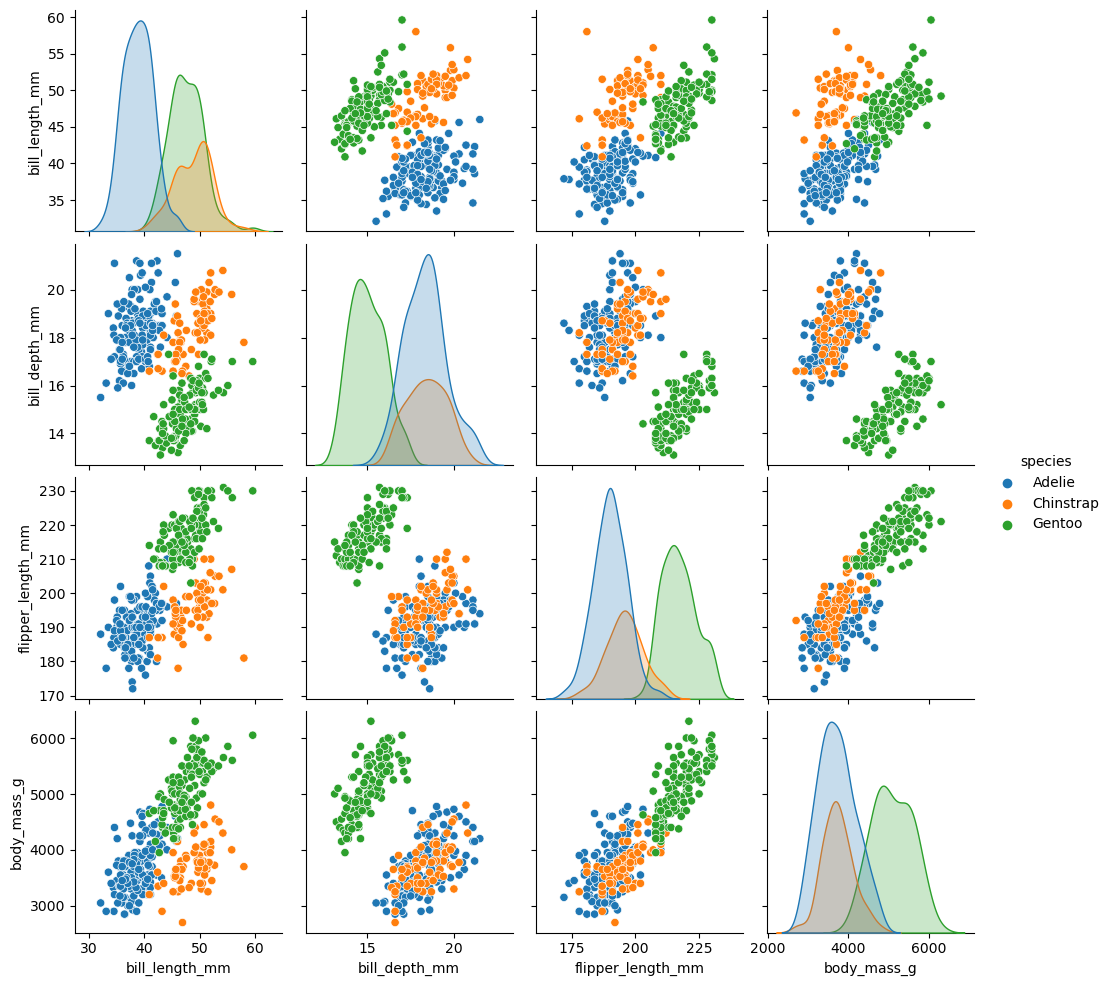

In [22]:
sns.pairplot(penguins_raw, hue='species');

### Логистическая регресссия

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf = LogisticRegression(max_iter=2000)

In [55]:
result_LogisticRegression = cross_validate(clf, X, y, scoring='f1_macro')['test_score']
print(*result_LogisticRegression)

0.9632478632478633 1.0 0.964696223316913 1.0 0.9810169491525423


### SVM

In [56]:
from sklearn.svm import SVC

In [79]:
clf = SVC()

In [58]:
result_SVC = cross_validate(clf, X, y, scoring='f1_macro')['test_score']
print(*result_SVC)

0.538743961352657 0.5068506275749737 0.5142857142857143 0.5615686274509804 0.5823552425665102


Плохо сработал. Попробуем изначально нормализовать данные

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X.loc[:, :] = scaler.transform(X)

In [80]:
result_SVC_ss = cross_validate(clf, X, y, scoring='f1_macro')['test_score']
print(*result_SVC_ss)

1.0 0.98200460347353 0.98200460347353 1.0 1.0


Мне кажется очевидным, почему KNN становится лучше при стандартизации. Но почему SVM?

### Дерево решений

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
clf = DecisionTreeClassifier()

In [61]:
result_DecisionTreeClassifier = cross_validate(clf, X, y, scoring='f1_macro')['test_score']
print(*result_DecisionTreeClassifier)

0.98200460347353 1.0 0.9060109289617486 0.9826577939100626 0.9361111111111112


### Случайный лес

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
clf = RandomForestClassifier()

In [64]:
result_RandomForestClassifier = cross_validate(clf, X, y, scoring='f1_macro')['test_score']
print(*result_RandomForestClassifier)

1.0 0.98200460347353 0.964696223316913 1.0 0.9679174788823911


### Наивный байесовский классификатор

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
clf = GaussianNB()

In [67]:
result_GaussianNB = cross_validate(clf, X, y, scoring='f1_macro')['test_score']
print(*result_GaussianNB)

0.98200460347353 0.9460138104205901 0.9460138104205901 0.964696223316913 0.9818063677712802


### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
clf = KNeighborsClassifier()

In [70]:
result_KNeighborsClassifier = cross_validate(clf, X, y, scoring='f1_macro')['test_score']
print(*result_KNeighborsClassifier)

0.6536729420450351 0.7187986305633364 0.7310606060606061 0.7722185648452928 0.8928571428571428


Плохо сработал. Попробуем изначально нормализовать данные

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [73]:
X.loc[:, :] = scaler.transform(X)

In [74]:
result_KNeighborsClassifier_ss = cross_validate(clf, X, y, scoring='f1_macro')['test_score']
print(*result_KNeighborsClassifier_ss)

0.98200460347353 0.98200460347353 0.98200460347353 1.0 1.0


Намного лучше

## Модели кластеризации
Покластеризуем тех же пингвинов и посмотрим насколько это совпадает с разбиением пингвинов на виды

In [7]:
penguins_raw = sns.load_dataset('penguins').dropna()
y = penguins_raw['species']
penguins = (
    pd.concat([penguins_raw, pd.get_dummies(penguins_raw.sex)], axis=1)
    .drop(columns=['island', 'sex', 'Male'])
)
X = penguins.iloc[:, 1:]  # данные по острову - сильная подсказка. Удалил их

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xs = scaler.transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

Данные будем использовать исходные (после one hot encoding) и стандартизованные

### KMeans

In [ ]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3).fit(X)

In [51]:
y_pred = kmeans.labels_

In [64]:
pairs = pd.DataFrame(np.vstack((y, y_pred)), index=['y', 'y_pred']).T

In [62]:
counter = np.ones(333)

In [65]:
pairs['counter'] = counter

Посмотрим как наши кластеры соотносятся с разделение на виды

In [67]:
# Не смог на таблице из двух столбиков построить сводную.
# Добавил столбик (который потом и не задействовал в функции) и сработало
pairs.pivot_table(index='y_pred', columns='y', aggfunc='count')

counter                 
y       Adelie Chinstrap Gentoo
y_pred                         
0        102.0      48.0    NaN
1         44.0      20.0   47.0
2          NaN       NaN   72.0

Такое себе

In [68]:
kmeans = KMeans(n_clusters=3).fit(Xs)
y_pred = kmeans.labels_
pairs = pd.DataFrame(np.vstack((y, y_pred)), index=['y', 'y_pred']).T
counter = np.ones(333)
pairs['counter'] = counter
pairs.pivot_table(index='y_pred', columns='y', aggfunc='count')

counter                 
y       Adelie Chinstrap Gentoo
y_pred                         
0         73.0      34.0    NaN
1          NaN       NaN  119.0
2         73.0      34.0    NaN

При использовании стандартизованных данных чуть получше: хотя бы Gentoo всех распознали.  
Как так получилось что 2 строки у нас оказались совершенно одинаковыми? :)

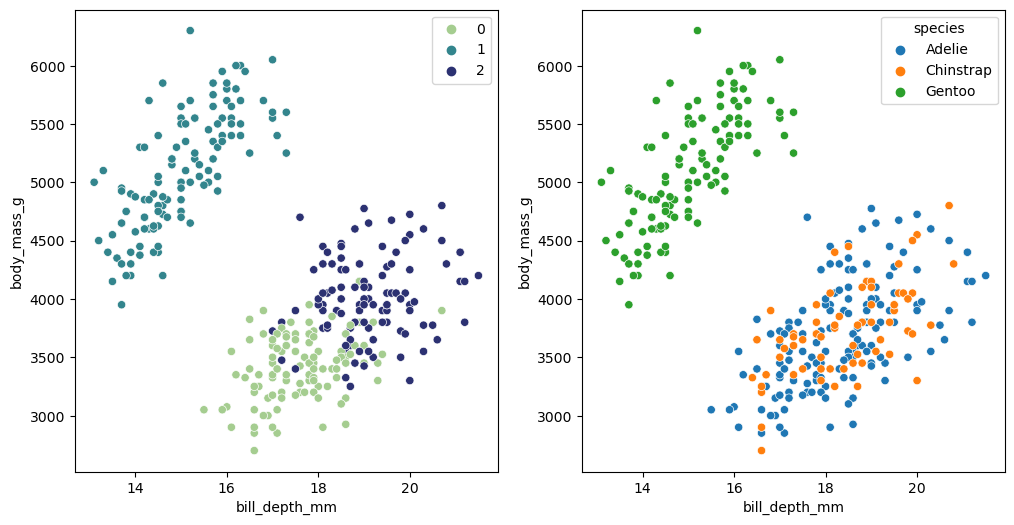

In [91]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(X, x='bill_depth_mm', y='body_mass_g', hue=y_pred, palette='crest');
plt.subplot(1, 2, 2)
sns.scatterplot(X, x='bill_depth_mm', y='body_mass_g', hue=y);

### Gaussian Mixture

In [6]:
from sklearn.mixture import GaussianMixture

In [12]:
gauss_mix = GaussianMixture(n_components=3, covariance_type='full')

In [13]:
gauss_mix.fit(Xs)

GaussianMixture(n_components=3)

In [15]:
y_pred = gauss_mix.predict(Xs)

In [16]:
pairs = pd.DataFrame(np.vstack((y, y_pred)), index=['y', 'y_pred']).T

In [17]:
counter = np.ones(333)

In [18]:
pairs['counter'] = counter

Посмотрим как наши кластеры соотносятся с разделение на виды

In [19]:
# Не смог на таблице из двух столбиков построить сводную.
# Добавил столбик (который потом и не задействовал в функции) и сработало
pairs.pivot_table(index='y_pred', columns='y', aggfunc='count')

counter                 
y       Adelie Chinstrap Gentoo
y_pred                         
0         73.0      34.0    NaN
1          NaN       NaN  118.0
2         73.0      34.0    1.0

Так себе. И генту одного попутал

In [66]:
gauss_mix = GaussianMixture(n_components=3, covariance_type='full').fit(Xs)
y_pred = gauss_mix.predict(Xs)
pairs = pd.DataFrame(np.vstack((y, y_pred)), index=['y', 'y_pred']).T
counter = np.ones(333)
pairs['counter'] = counter
pairs.pivot_table(index='y_pred', columns='y', aggfunc='count')

counter                 
y       Adelie Chinstrap Gentoo
y_pred                         
0         73.0      34.0    NaN
1         73.0      34.0   61.0
2          NaN       NaN   58.0

Странно. Чаще генту делятся 118 на 1, но иногда - 58 на 61.  
Как так получилось что 2 строки у нас оказались совершенно одинаковыми? :)

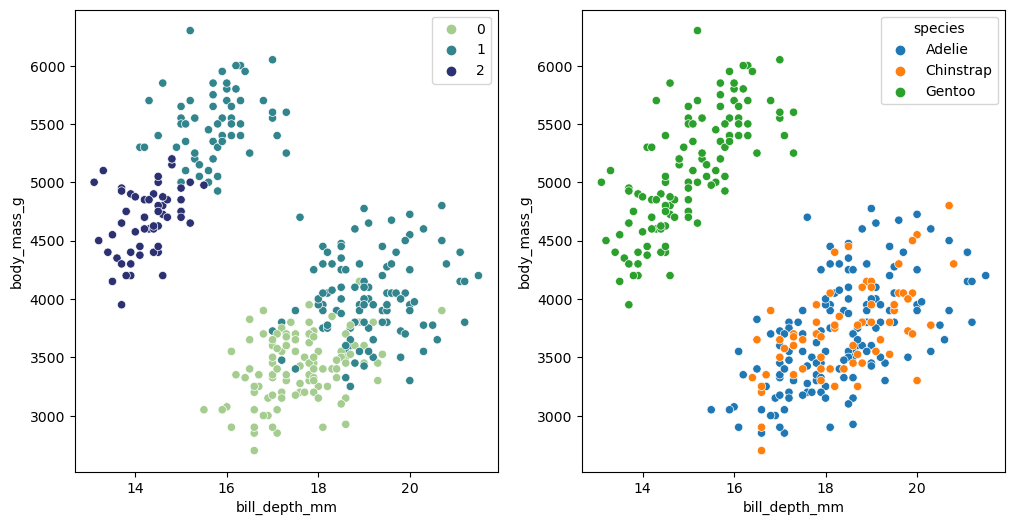

In [67]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='bill_depth_mm', y='body_mass_g', hue=y_pred, palette='crest');
plt.subplot(1, 2, 2)
sns.scatterplot(data=X, x='bill_depth_mm', y='body_mass_g', hue=y);

### DBSCAN

In [15]:
from sklearn.cluster import dbscan

In [17]:
y_pred = dbscan(Xs)[1]
y_pred

array([ 0,  1,  1,  1,  2,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  0,
        1,  2, -1,  1,  0,  1, -1,  0, -1, -1,  1,  0,  1, -1,  2, -1, -1,
        2,  1,  2, -1,  2,  1,  2,  0,  1, -1,  1,  2,  1,  2, -1,  2,  1,
        2,  1,  2,  1, -1,  1,  2,  1,  2,  1,  0,  1,  2, -1,  2,  1, -1,
        1,  2,  1,  2,  1,  2,  1, -1,  1, -1,  1, -1,  2,  1,  2,  1, -1,
       -1,  1,  2,  1, -1,  1,  2, -1,  2,  1, -1, -1,  2, -1,  0, -1,  2,
        1, -1, -1, -1,  1,  2, -1,  2,  1, -1,  1,  2,  1, -1, -1,  2,  1,
        2,  1,  2,  1, -1,  1, -1,  1, -1,  1,  2,  1,  2,  1,  2,  1, -1,
       -1, -1,  1,  0,  2,  1,  1,  2,  1,  2,  3,  4,  4, -1,  4,  3, -1,
        4, -1,  4,  3,  4,  3,  4,  3,  4, -1, -1,  3, -1, -1, -1, -1,  4,
        3,  4, -1,  4,  3, -1, -1, -1, -1,  4,  4, -1,  3, -1, -1, -1, -1,
        3,  4,  3, -1,  4, -1, -1, -1, -1, -1,  4,  3,  4, -1,  4,  3,  4,
        4, -1,  4,  3,  3, -1, -1,  4,  4, -1,  5,  6,  5,  6,  6,  5,  5,
        6,  5,  6,  5,  6

In [18]:
pairs = pd.DataFrame(np.vstack((y, y_pred)), index=['y', 'y_pred']).T

In [19]:
counter = np.ones(333)

In [20]:
pairs['counter'] = counter

Посмотрим как наши кластеры соотносятся с разделение на виды

In [21]:
pairs.pivot_table(index='y_pred', columns='y', aggfunc='count')

counter                 
y       Adelie Chinstrap Gentoo
y_pred                         
-1        43.0      30.0   12.0
 0         9.0       NaN    NaN
 1        56.0       NaN    NaN
 2        38.0       NaN    NaN
 3         NaN      15.0    NaN
 4         NaN      23.0    NaN
 5         NaN       NaN   57.0
 6         NaN       NaN   50.0

С настройками пор умолчанию - плохо. Много неизвестных классов. Но зато остальное понятное, вроде.

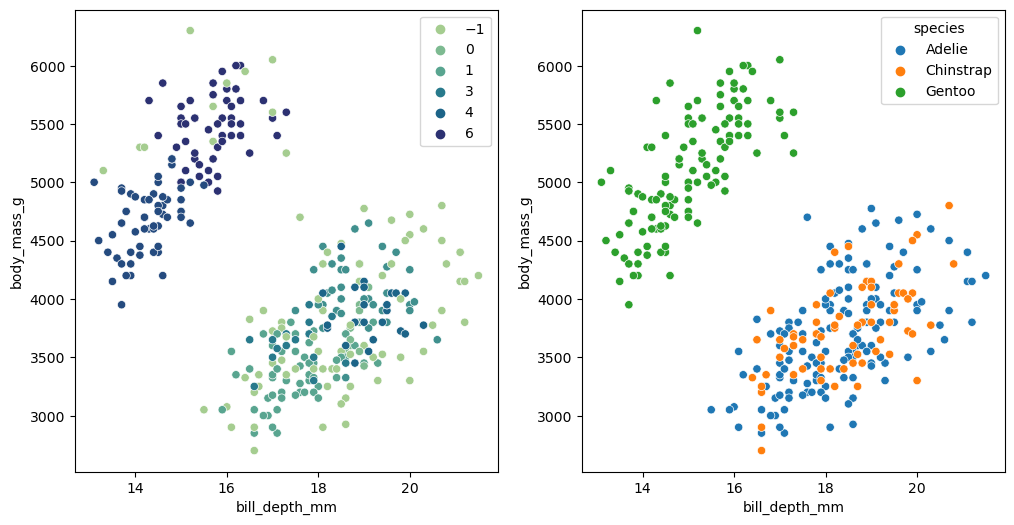

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X, x='bill_depth_mm', y='body_mass_g', hue=y_pred, palette='crest');
plt.subplot(1, 2, 2)
sns.scatterplot(data=X, x='bill_depth_mm', y='body_mass_g', hue=y);

In [34]:
X.sample(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Female
154,51.3,19.2,193.0,3650.0,0
181,52.8,20.0,205.0,4550.0,0
309,52.1,17.0,230.0,5550.0,0
81,42.9,17.6,196.0,4700.0,0
142,32.1,15.5,188.0,3050.0,1
113,42.2,19.5,197.0,4275.0,0
295,48.6,16.0,230.0,5800.0,0
203,51.4,19.0,201.0,3950.0,0
182,40.9,16.6,187.0,3200.0,1
264,50.5,15.9,222.0,5550.0,0


In [35]:
X.body_mass_g.dtype

dtype('float64')